dg chips

In [1]:
!python --version

Python 3.7.11


In [2]:
pip list

Package                 Version
----------------------- ---------
absl-py                 1.0.0
albumentations          1.1.0
argcomplete             1.12.3
argon2-cffi             21.1.0
attrs                   21.2.0
backcall                0.2.0
beautifulsoup4          4.10.0
bleach                  4.1.0
blis                    0.7.5
boto3                   1.20.4
botocore                1.23.4
bravado                 11.0.3
bravado-core            5.17.0
brotlipy                0.7.0
cachetools              4.2.4
captum                  0.4.1
catalogue               2.0.6
catalyst                21.10
certifi                 2021.10.8
cffi                    1.14.6
chardet                 4.0.0
click                   8.0.3
conda                   4.10.3
conda-build             3.21.5
conda-package-handling  1.7.3
configparser            5.1.0
cryptography            3.4.8
cycler                  0.11.0
cymem                   2.0.6
debugpy                 1.5.1
decorator         

Next, change directory to wherever you created your folder. 

In [6]:
!pwd
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/ir'
WORKING_DIRECTORY = '/notebooks/ml635e2/ml635epps/ir'
os.chdir(WORKING_DIRECTORY)
!pwd

/notebooks/ml635e2/ml635epps/ir
/notebooks/ml635e2/ml635epps/ir


In [7]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls

_this.12a.txt  images  train  train.csv  val  val.csv


Now, let's install the Detecto package using pip. 

In [8]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Import everything we need in the following code block:

In [16]:
%%bash
apt update
DEBIAN_FRONTEND=noninteractive apt-get install -y python3-opencv
#tz prompt. dpkg fix...
pip install opencv-python


Get:1 http://ppa.launchpad.net/git-core/ppa/ubuntu bionic InRelease [20.8 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/git-core/ppa/ubuntu bionic/main amd64 Packages [3163 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.8 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [982 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2290 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1515 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2830 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [29.8 kB]
Get:13 http:/



debconf: delaying package configuration, since apt-utils is not installed


In [17]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

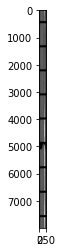

In [18]:
image = utils.read_image('images/inner_rim_210805T104053.png')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [19]:
# Do this twice: once for our trning labels and once for our validation labels
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('val', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,inner_rim_210805T104131.png,260,7990,Chip,1,1364,191,1694,0
1,inner_rim_210805T104053.png,260,7990,Chip,2,4899,192,5231,1
2,inner_rim_210805T104112.png,260,7990,Chip,1,4013,192,4332,2


Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

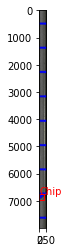

In [20]:
# Specify a list of transformations for our dataset to apply on our images
# transform_img = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize(800),
#     transforms.RandomHorizontalFlip(0.5),
#     transforms.ToTensor(),
#     utils.normalize_transform(),
# ])

dataset = core.Dataset('train.csv', 'images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [21]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Chip'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=3, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 3
Begin iterating over training dataset


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  0%|          | 0/2 [00:02<?, ?it/s]


AssertionError: 

Let's see how well our model does on a couple images from our validation set:

In [11]:
images = []
# Create a list of images  from val_dataset
for i in range(0, 2, 1):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a  grid of the model's predictions on our  images
visualize.plot_prediction_grid(model, images, dim=(1, 3), figsize=(33, 33))

ValueError: Grid dimensions do not match size of list of images

## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!